# Convert Xcel to CSV file

In [39]:
import xlrd
import csv

def csv_from_excel():
    wb = xlrd.open_workbook('corpus_for_test.xlsx')
    sh = wb.sheet_by_name('corpus')
    your_csv_file = open('corpus_for_test.csv', 'w',encoding = 'UTF-8')
    wr = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)

    for rownum in range(sh.nrows):
        wr.writerow(sh.row_values(rownum))

    your_csv_file.close()

# runs the csv_from_excel function:
csv_from_excel()

## Import Libraries

In [2]:
import numpy as np # linear algebra
import re
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

import seaborn as sns
import matplotlib.pyplot as plt
import os


Using TensorFlow backend.


In [3]:
dataset = pd.read_csv('annotated_corpus_for_train.csv',encoding='UTF-8') 
print(dataset.head(5))

                                               story gender
0  בוקר אחד קמתי סהרורי יצאתי מהמיטה קצת מטושטש ,...      m
1  לחבר שלי היה יום הולדת וחיפשנו מה אפשר לעשות ל...      m
2  השנה האחרונה הייתה שנת קורונה, שנה לא פשוטה בק...      m
3  לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי, עב...      m
4  יום חמישי רגיל, תמיד מתחיל לעבור טיפה מאוחר יו...      m


In [31]:
test_data = pd.read_csv('corpus_for_test.csv',encoding='UTF-8') 
print(test_data.head(5))

   test_example_id                                              story
0              0.0  כחלק ממסגרת ההתנדבות שלי במגלה אני הולך לפעמיי...
1              1.0  לפני שנה החלטתי שאני רוצה להיות טייס, התחלתי ל...
2              2.0  בתקופת הקורונה של תחילת החיסונים נגד קורונה, א...
3              3.0  כפי שכולם מכירים או שמעו מחברים עולם הדייטים ה...
4              4.0  אחת החוויות שהכי זכורות לי, זו החוויה בפרו בטי...


In [5]:
dataset.columns

Index(['story', 'gender'], dtype='object')

In [32]:
print(dataset.shape)
print(test_data.shape)

(364, 2)
(156, 2)


In [33]:
label = dataset['gender']
print(label)

0      m
1      m
2      m
3      m
4      m
      ..
359    m
360    m
361    m
362    m
363    f
Name: gender, Length: 364, dtype: object


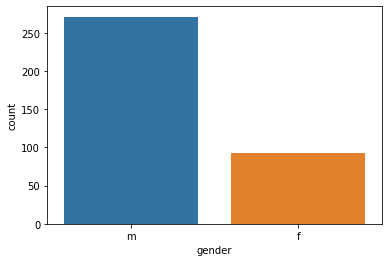

In [34]:
sns.countplot(dataset['gender'])

In [35]:
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(label)
print(label)

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1
 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1
 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0
 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0]


In [36]:
#dataset.drop('label',axis=1,inplace=True)
train = dataset['story']
test = test_data['story']
print(train.head(5))
print(test.head(5))

0    בוקר אחד קמתי סהרורי יצאתי מהמיטה קצת מטושטש ,...
1    לחבר שלי היה יום הולדת וחיפשנו מה אפשר לעשות ל...
2    השנה האחרונה הייתה שנת קורונה, שנה לא פשוטה בק...
3    לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי, עב...
4    יום חמישי רגיל, תמיד מתחיל לעבור טיפה מאוחר יו...
Name: story, dtype: object
0    כחלק ממסגרת ההתנדבות שלי במגלה אני הולך לפעמיי...
1    לפני שנה החלטתי שאני רוצה להיות טייס, התחלתי ל...
2    בתקופת הקורונה של תחילת החיסונים נגד קורונה, א...
3    כפי שכולם מכירים או שמעו מחברים עולם הדייטים ה...
4    אחת החוויות שהכי זכורות לי, זו החוויה בפרו בטי...
Name: story, dtype: object


In [37]:
count_vectorizer = CountVectorizer(ngram_range=(1,1))
train = count_vectorizer.fit_transform(train)
test = count_vectorizer.transform(test)
print(train.shape)
print(test.shape)

(364, 22113)
(156, 22113)


In [12]:
x_train,x_val,y_train,y_val = train_test_split(train,label,test_size = 0.2,shuffle=True,random_state = 3)

# K Nearest Neighbour

0.62
              precision    recall  f1-score   support

           0       0.46      0.50      0.48        26
           1       0.71      0.68      0.70        47

    accuracy                           0.62        73
   macro avg       0.59      0.59      0.59        73
weighted avg       0.62      0.62      0.62        73



****************************************************************************************************
0.63
              precision    recall  f1-score   support

           0       0.49      0.69      0.57        26
           1       0.78      0.60      0.67        47

    accuracy                           0.63        73
   macro avg       0.63      0.64      0.62        73
weighted avg       0.67      0.63      0.64        73



****************************************************************************************************
0.68
              precision    recall  f1-score   support

           0       0.57      0.46      0.51        26
           1    

D:\Anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




****************************************************************************************************
0.62
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.63      0.96      0.76        47

    accuracy                           0.62        73
   macro avg       0.32      0.48      0.38        73
weighted avg       0.41      0.62      0.49        73



****************************************************************************************************
0.64
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weighted avg       0.41      0.64      0.50        73



****************************************************************************************************


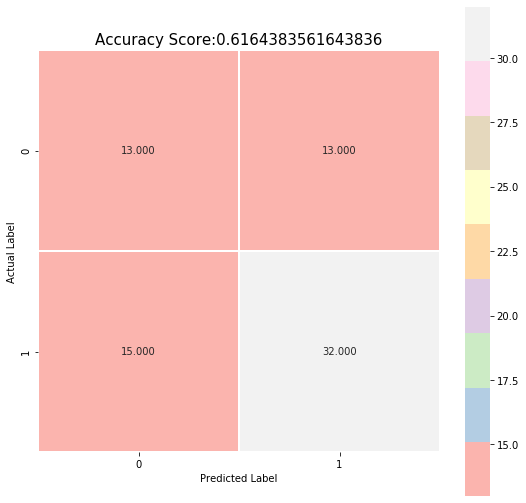

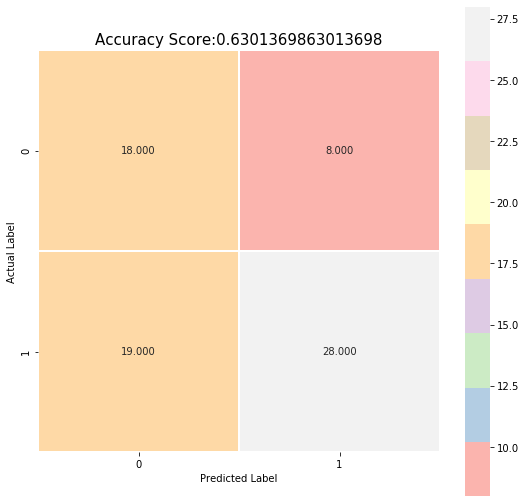

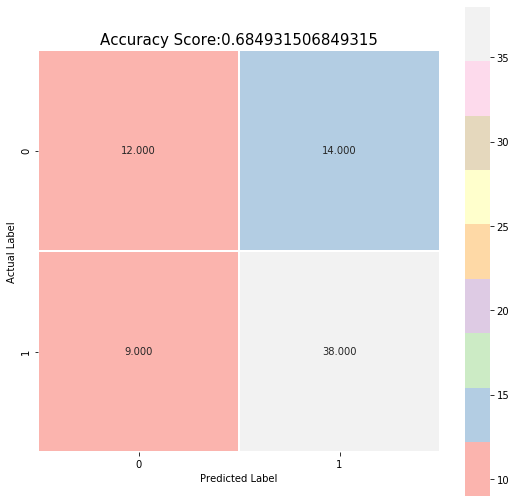

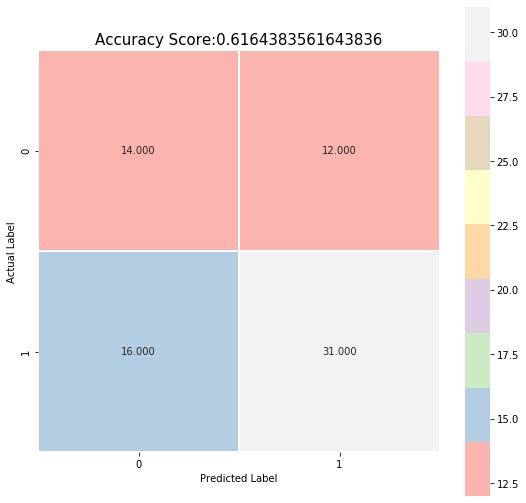

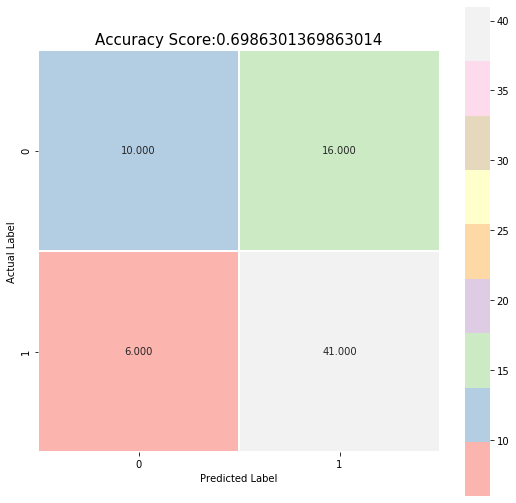

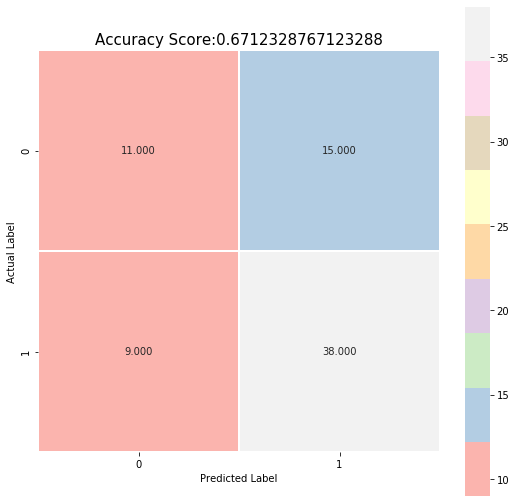

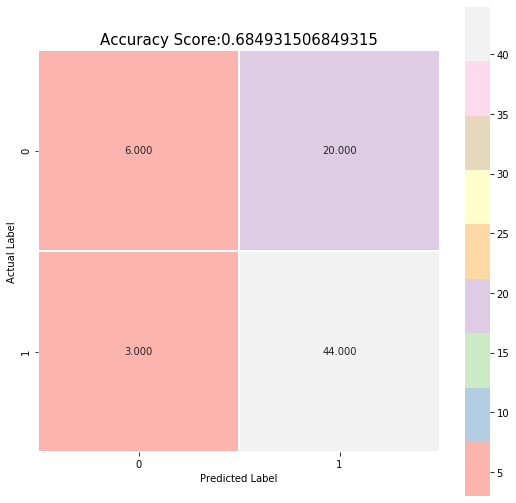

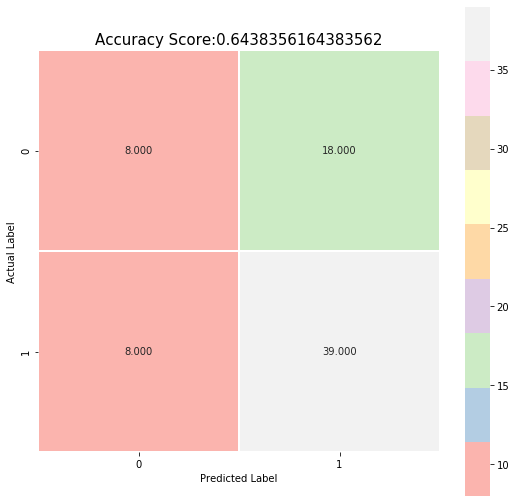

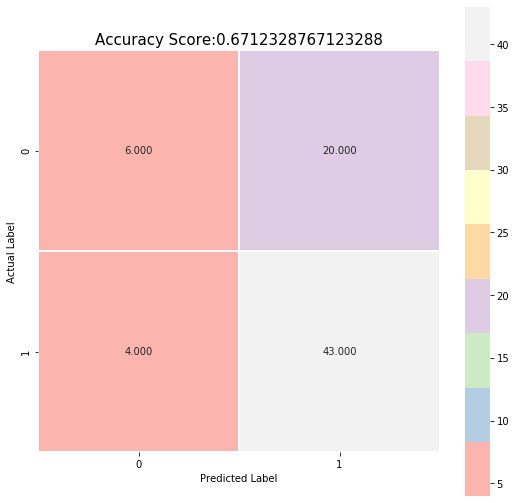

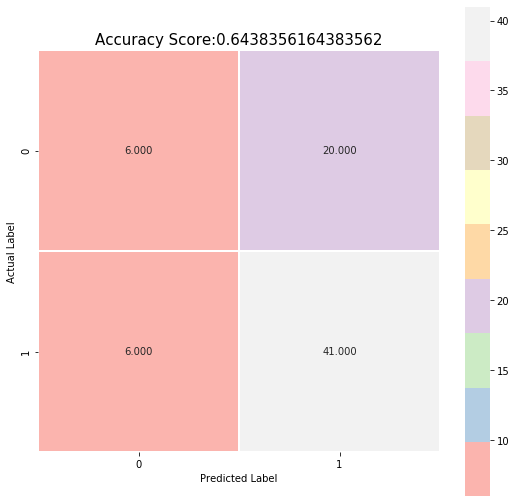

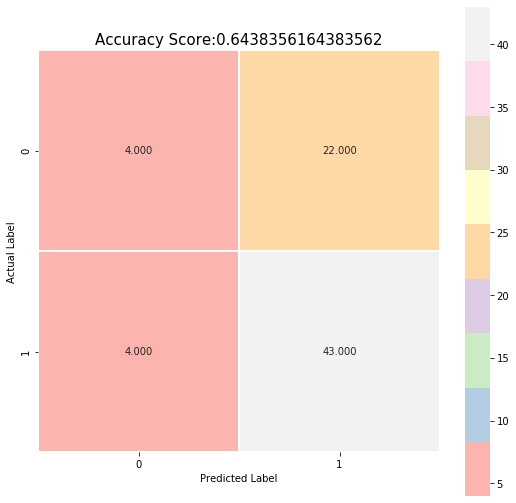

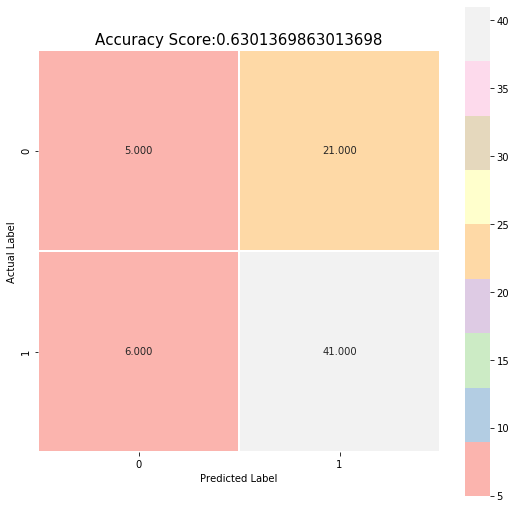

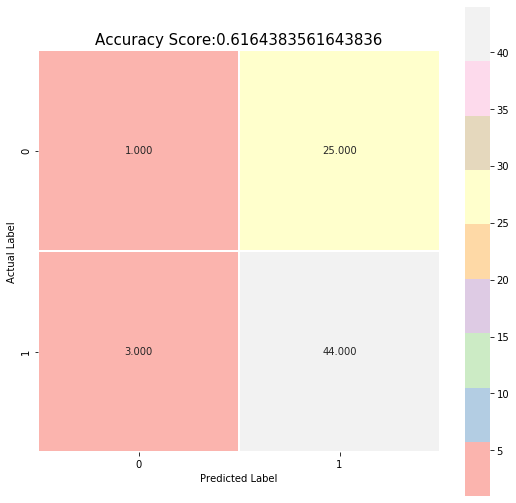

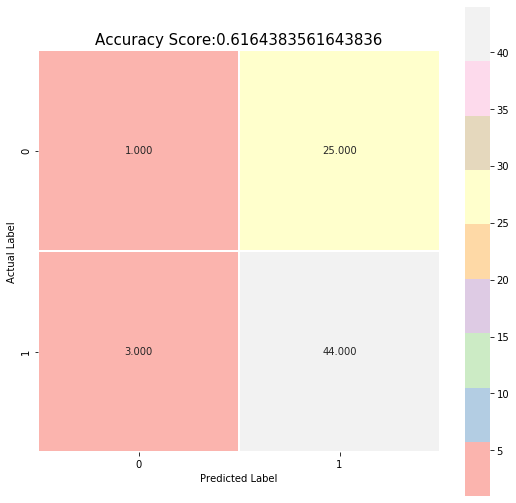

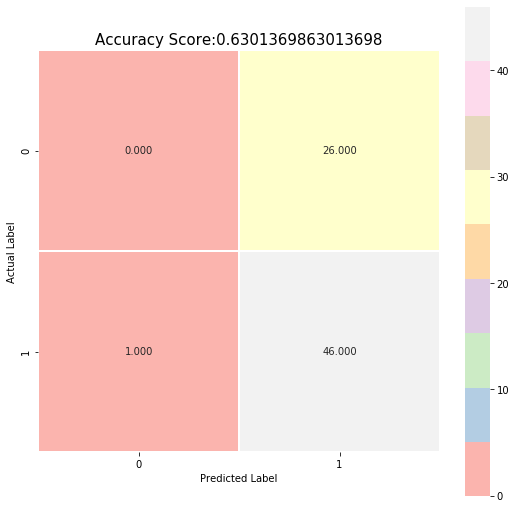

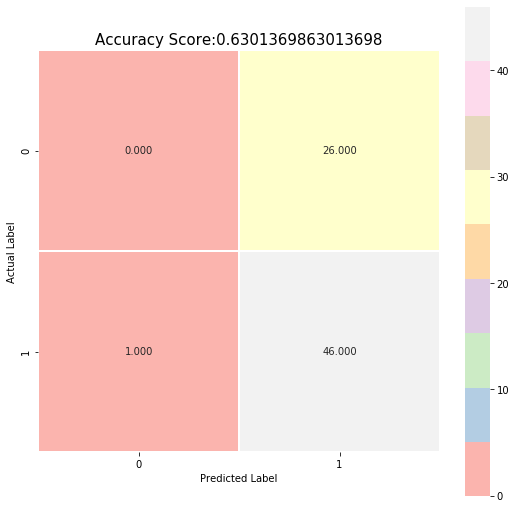

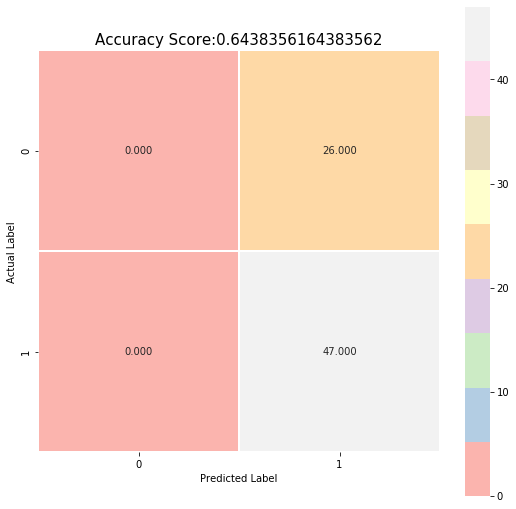

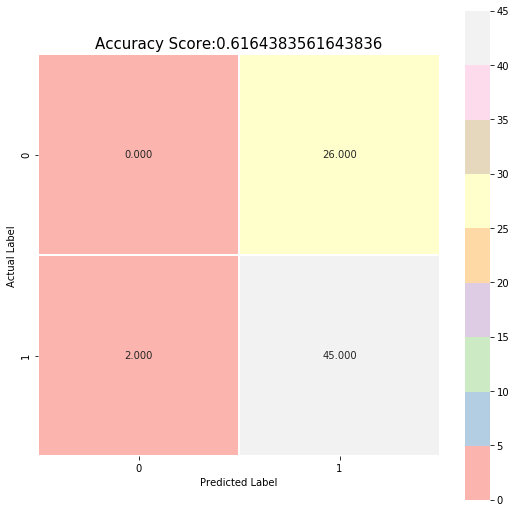

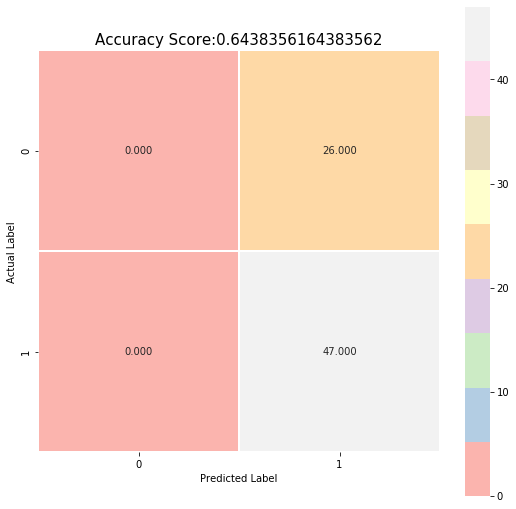

In [15]:
error=[]
for i in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train,y_train)
    y_pred = neigh.predict(x_val)
    
    accuracy = accuracy_score(y_val, y_pred) 
    print(round(accuracy,2))
    print(classification_report(y_val, y_pred))
    
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
    plt.ylabel("Actual Label");
    plt.xlabel("Predicted Label");
    all_sample_title='Accuracy Score:{0}'.format(accuracy)
    plt.title(all_sample_title,size=15);

    print()
    print()
    
    print("*"*100)
    
    

# Gaussian NB

accuracy =  0.66
              precision    recall  f1-score   support

           0       1.00      0.04      0.07        26
           1       0.65      1.00      0.79        47

    accuracy                           0.66        73
   macro avg       0.83      0.52      0.43        73
weighted avg       0.78      0.66      0.53        73



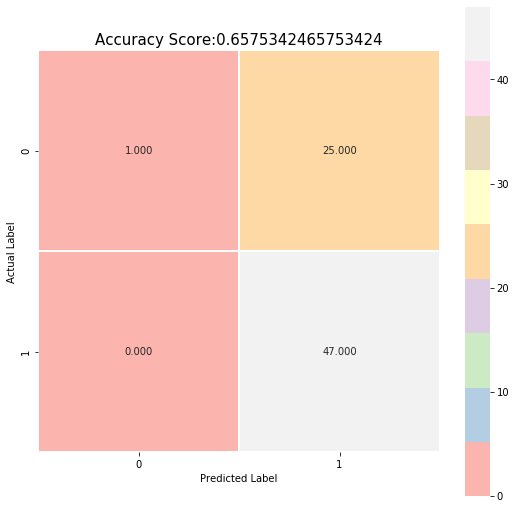

In [16]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train.toarray(), y_train).predict(x_val.toarray())

accuracy = accuracy_score(y_val, y_pred) 
print("accuracy = ",round(accuracy,2))
print(classification_report(y_val, y_pred))
    
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


# Support Vector Classifier

In [17]:
svc_model = svm.SVC(kernel = 'rbf', gamma = 'auto',random_state = 0)
svc_model
svc_model.fit(x_train,y_train)
y_pred = svc_model.predict(x_val)
print(y_pred)
accuracy = accuracy_score(y_val,y_pred)
print("accuracy = ", round(accuracy,2))
print(classification_report(y_val,y_pred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
accuracy =  0.64
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weighted avg       0.41      0.64      0.50        73



D:\Anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


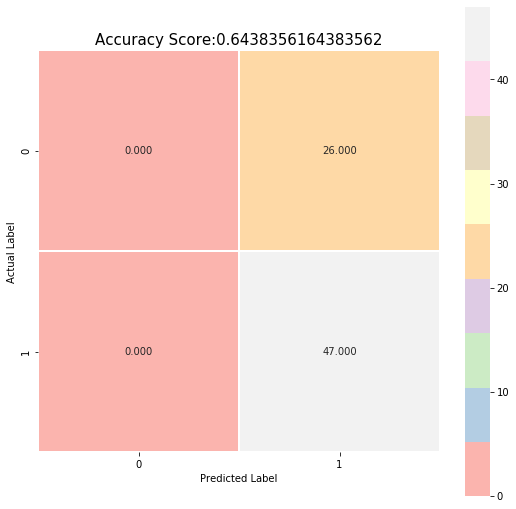

In [18]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


# Random Forest


In [19]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train,y_train)
y_pred = random_forest_model.predict(x_val)
print(y_pred)
accuracy = accuracy_score(y_val,y_pred)
print("accuracy = ", round(accuracy,2))
print(classification_report(y_val,y_pred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
accuracy =  0.66
              precision    recall  f1-score   support

           0       1.00      0.04      0.07        26
           1       0.65      1.00      0.79        47

    accuracy                           0.66        73
   macro avg       0.83      0.52      0.43        73
weighted avg       0.78      0.66      0.53        73



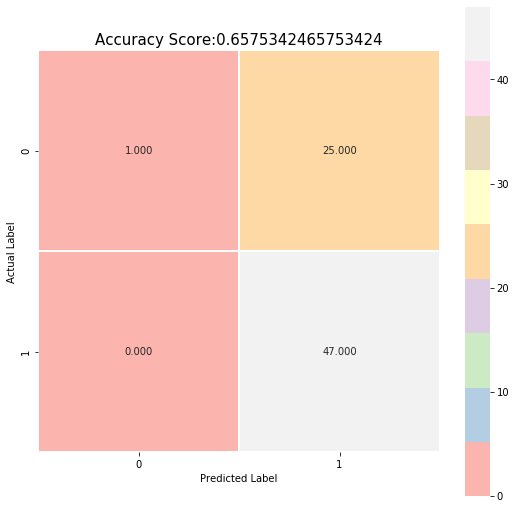

In [20]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


# Bernoulli NB

In [21]:
bernoulliNB_model = BernoulliNB()
bernoulliNB_model.fit(x_train,y_train)
y_pred = bernoulliNB_model.predict(x_val)
print(y_pred)
accuracy = accuracy_score(y_val,y_pred)
print("accuracy = ", round(accuracy,2))
print(classification_report(y_val,y_pred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
accuracy =  0.64
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weighted avg       0.41      0.64      0.50        73



D:\Anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


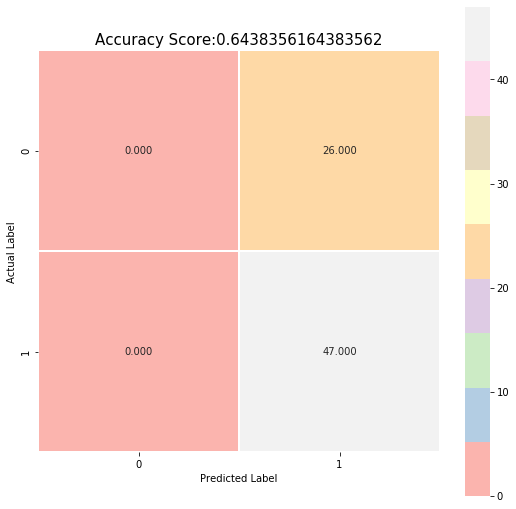

In [22]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


# Gradient Boosting Classifier

In [23]:
gradientBoosting_model = GradientBoostingClassifier()
gradientBoosting_model.fit(x_train,y_train)
y_pred = gradientBoosting_model.predict(x_val)
print(y_pred)
accuracy = accuracy_score(y_val,y_pred)
print("accuracy = ", round(accuracy,2))
print(classification_report(y_val,y_pred))

[0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
accuracy =  0.62
              precision    recall  f1-score   support

           0       0.38      0.12      0.18        26
           1       0.65      0.89      0.75        47

    accuracy                           0.62        73
   macro avg       0.51      0.50      0.46        73
weighted avg       0.55      0.62      0.55        73



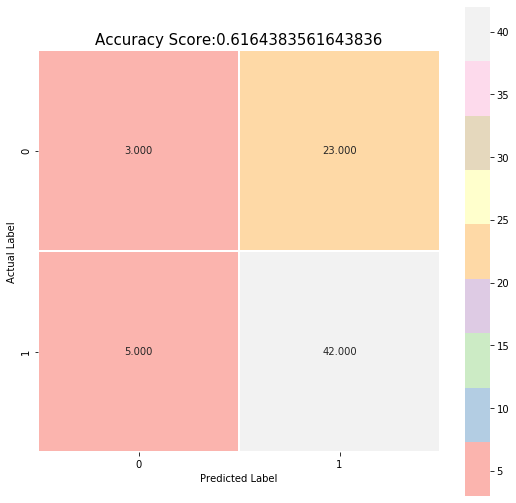

In [24]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


0.68
              precision    recall  f1-score   support

           0       0.57      0.46      0.51        26
           1       0.73      0.81      0.77        47

    accuracy                           0.68        73
   macro avg       0.65      0.64      0.64        73
weighted avg       0.67      0.68      0.68        73



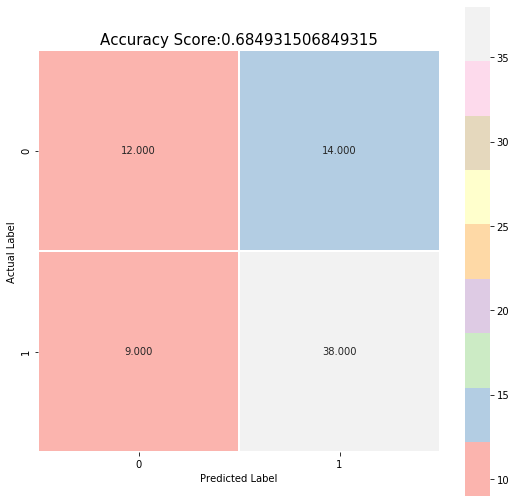

In [25]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)
y_pred = neigh.predict(x_val)
accuracy = accuracy_score(y_val, y_pred) 
print(round(accuracy,2))
print(classification_report(y_val, y_pred))
    
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


# Logistic Regression

[1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1]
accuracy =  0.71
              precision    recall  f1-score   support

           0       0.78      0.27      0.40        26
           1       0.70      0.96      0.81        47

    accuracy                           0.71        73
   macro avg       0.74      0.61      0.61        73
weighted avg       0.73      0.71      0.66        73



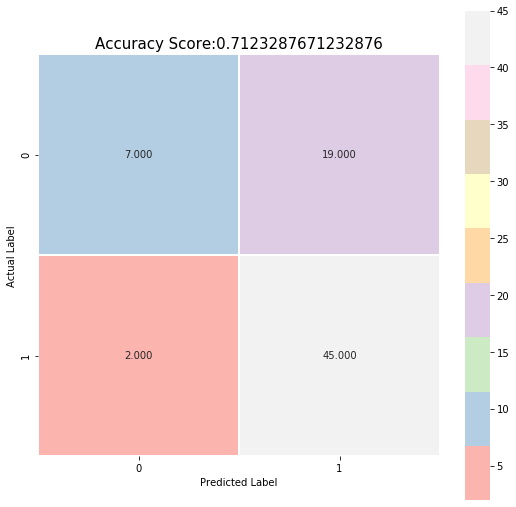

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)
print(y_pred)
accuracy = accuracy_score(y_val,y_pred)
print("accuracy = ", round(accuracy,2))
print(classification_report(y_val,y_pred))

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


# MultiNomial NB

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
accuracy =  0.66
              precision    recall  f1-score   support

           0       0.67      0.08      0.14        26
           1       0.66      0.98      0.79        47

    accuracy                           0.66        73
   macro avg       0.66      0.53      0.46        73
weighted avg       0.66      0.66      0.56        73



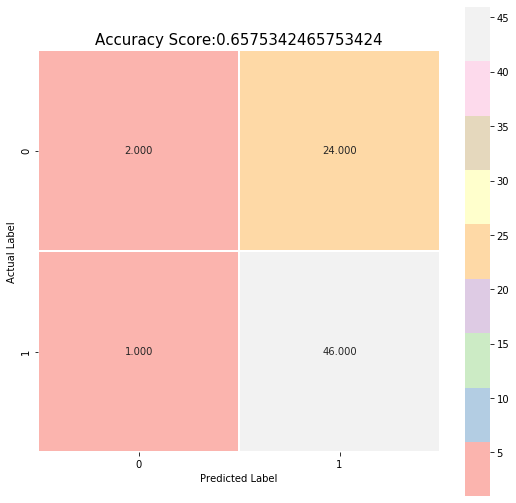

In [13]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_val)
print(y_pred)
accuracy = accuracy_score(y_val,y_pred)
print("accuracy = ", round(accuracy,2))
print(classification_report(y_val,y_pred))

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


# XGBoost

In [16]:
!pip install hyperopt

In [23]:
from xgboost import XGBClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train, y_train), ( x_val, y_val)]
    
    clf.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    y_pred = clf.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred>0.5)
    print ("SCORE:", accuracy)
    print(classification_report(y_val,y_pred))
    return {'loss': -accuracy, 'status': STATUS_OK }

In [24]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                 
0.3561643835616438                                     
              precision    recall  f1-score   support  

           0       0.36      1.00      0.53        26
           1       0.00      0.00      0.00        47

    accuracy                           0.36        73
   macro avg       0.18      0.50      0.26        73
weighted avg       0.13      0.36      0.19        73

  1%|          | 1/100 [00:00<01:34,  1.05trial/s, best loss: -0.3561643835616438]

D:\Anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



SCORE:                                                                            
0.6438356164383562                                                                
              precision    recall  f1-score   support                             

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weighted avg       0.41      0.64      0.50        73

SCORE:                                                                            
0.3561643835616438                                                                
              precision    recall  f1-score   support                             

           0       0.36      1.00      0.53        26
           1       0.00      0.00      0.00        47

    accuracy                           0.36        73
   macro avg       0.18      0.50      0.26        73
weighted av

SCORE:                                                                             
0.3561643835616438                                                                 
              precision    recall  f1-score   support                              

           0       0.36      1.00      0.53        26
           1       0.00      0.00      0.00        47

    accuracy                           0.36        73
   macro avg       0.18      0.50      0.26        73
weighted avg       0.13      0.36      0.19        73

SCORE:                                                                             
0.6438356164383562                                                                 
              precision    recall  f1-score   support                              

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weigh

SCORE:                                                                             
0.3561643835616438                                                                 
              precision    recall  f1-score   support                              

           0       0.36      1.00      0.53        26
           1       0.00      0.00      0.00        47

    accuracy                           0.36        73
   macro avg       0.18      0.50      0.26        73
weighted avg       0.13      0.36      0.19        73

SCORE:                                                                             
0.6438356164383562                                                                 
              precision    recall  f1-score   support                              

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weigh

SCORE:                                                                             
0.3561643835616438                                                                 
              precision    recall  f1-score   support                              

           0       0.36      1.00      0.53        26
           1       0.00      0.00      0.00        47

    accuracy                           0.36        73
   macro avg       0.18      0.50      0.26        73
weighted avg       0.13      0.36      0.19        73

SCORE:                                                                             
0.3561643835616438                                                                 
              precision    recall  f1-score   support                              

           0       0.36      1.00      0.53        26
           1       0.00      0.00      0.00        47

    accuracy                           0.36        73
   macro avg       0.18      0.50      0.26        73
weigh

SCORE:                                                                             
0.3561643835616438                                                                 
              precision    recall  f1-score   support                              

           0       0.36      1.00      0.53        26
           1       0.00      0.00      0.00        47

    accuracy                           0.36        73
   macro avg       0.18      0.50      0.26        73
weighted avg       0.13      0.36      0.19        73

SCORE:                                                                             
0.6438356164383562                                                                 
              precision    recall  f1-score   support                              

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weigh

SCORE:                                                                             
0.3561643835616438                                                                 
              precision    recall  f1-score   support                              

           0       0.36      1.00      0.53        26
           1       0.00      0.00      0.00        47

    accuracy                           0.36        73
   macro avg       0.18      0.50      0.26        73
weighted avg       0.13      0.36      0.19        73

SCORE:                                                                             
0.6438356164383562                                                                 
              precision    recall  f1-score   support                              

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weigh

SCORE:                                                                             
0.6438356164383562                                                                 
              precision    recall  f1-score   support                              

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        47

    accuracy                           0.64        73
   macro avg       0.32      0.50      0.39        73
weighted avg       0.41      0.64      0.50        73

SCORE:                                                                             
0.3561643835616438                                                                 
              precision    recall  f1-score   support                              

           0       0.36      1.00      0.53        26
           1       0.00      0.00      0.00        47

    accuracy                           0.36        73
   macro avg       0.18      0.50      0.26        73
weigh

In [15]:
from sklearn.utils import class_weight
# Compute the class weight with sklearn 
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

print(*[f'Class weight: {round(i[0],4)}\tclass: {i[1]}' for i in zip(class_weights, np.unique(y_train))], sep='\n')
# Determined if the dataset is balanced or imbalanced 
ratio = np.min(dataset.gender.value_counts()) / np.max(dataset.gender.value_counts())
if ratio > 0.1:      # Ratio 1:10 -> limite blanced / imbalanced 
    balanced = True
    print(f"\nThe dataset is balanced (ratio={round(ratio, 3)})")
else:
    balanced = False
    print(f"\nThe dataset is imbalanced (ratio={round(ratio, 3)})")
    #from imblearn.over_sampling import ADASYN
    # put class for debalanced data 
    # in progress

Class weight: 2.1716	class: 0
Class weight: 0.6496	class: 1

The dataset is balanced (ratio=0.343)


[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
accuracy =  0.75
              precision    recall  f1-score   support

           0       1.00      0.31      0.47        26
           1       0.72      1.00      0.84        47

    accuracy                           0.75        73
   macro avg       0.86      0.65      0.65        73
weighted avg       0.82      0.75      0.71        73



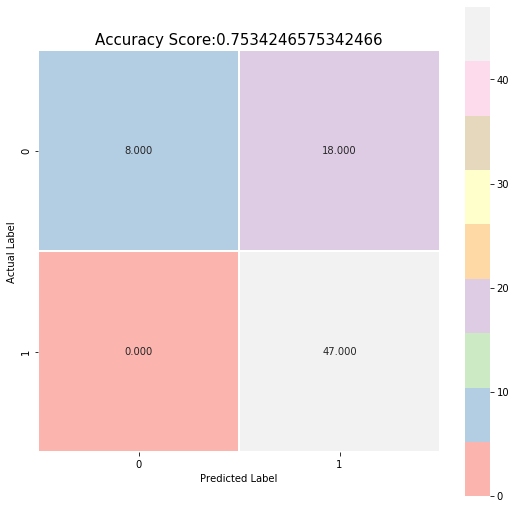

In [18]:
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_val)
print(y_pred)
accuracy = accuracy_score(y_val,y_pred)
print("accuracy = ", round(accuracy,2))
print(classification_report(y_val,y_pred))

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


## Save best model

In [19]:
import pickle
pickle.dump(sgd,open('sgd model.pkl','wb'))

## Make Prediction on test Data and save results

In [42]:
# Load the Saved Model

model = pickle.load(open('sgd model.pkl', 'rb'))
file = pd.read_csv('corpus_for_test.csv',encoding='UTF-8')

prediction = model.predict(test)
print(prediction)

prediction = list(prediction)
pred = []

for i in prediction:
    if i == 1:
        x = 'm'
    elif i == 0:
        x = 'f'
        
    pred.append(x)

    file['Model_prediction'] = pred
file.to_csv('corpus_for_test.csv',index=False)

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]
